## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    roc_curve, 
    recall_score, 
    confusion_matrix, 
    precision_score, 
    f1_score, 
    accuracy_score, 
    classification_report
    )

Implement SVM


Load dữ liệu

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", engine='c')
# df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### General information about the data

In [3]:
df.columns #lay lable tu head coi so luong column

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe() # tra ve cac thong so std, mean, min, max

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
df.isnull().sum() # kiem tra so du lieu bi NULL 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Có thể nói, chúng ta CỰC KÌ may mắn khi dữ liệu của chúng ta hoàn toàn k có giá trị null. Ngoài thực tế, dưới kinh nghiệm cá nhân thì chuyện dữ liệu bị khuyết, thiếu, lệch data type là một trong những pain point khi làm việc.

# EDA - Exploratory Data Analysis

## Gender proportion

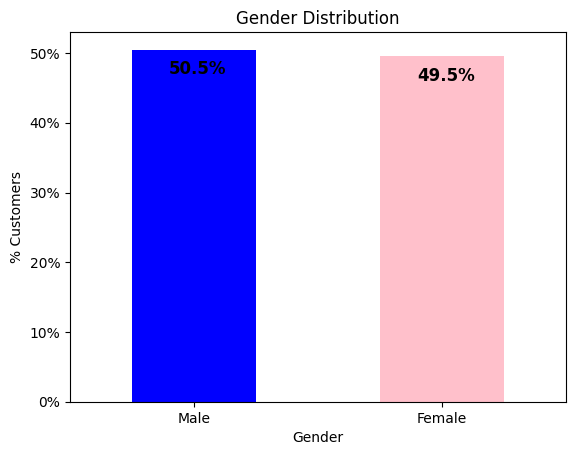

In [7]:
colors = ['blue', 'pink']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

total = sum([i.get_width() for i in ax.patches])


for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',
        fontsize=12, color='black', weight = 'bold')

## Marital Status

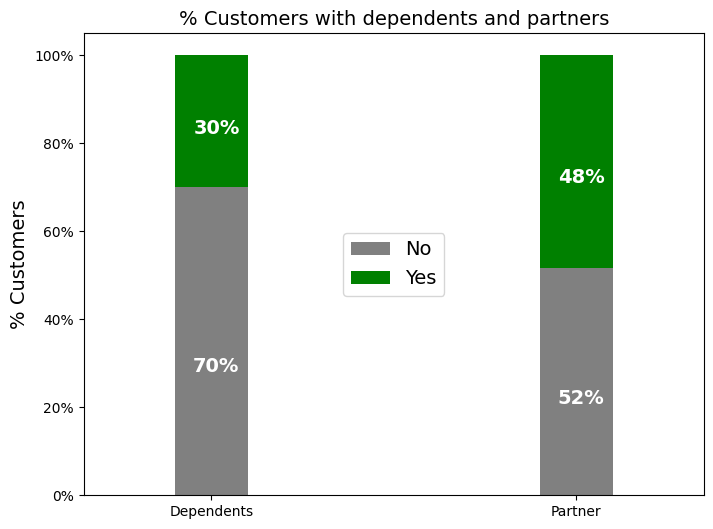

In [8]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/df.shape[0]
colors = ['grey','green']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## Senior Citizen distribution

Text(0.5, 1.0, '% of Senior Citizens')

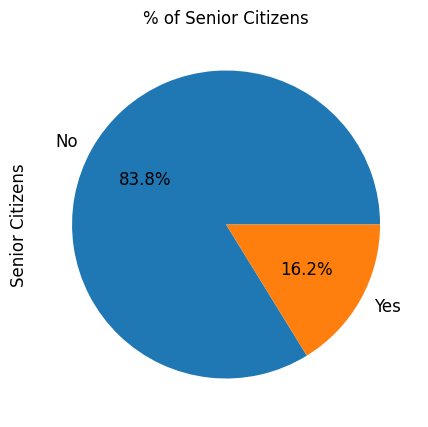

In [9]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /df.shape[0])\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

## Contracts type

Text(0.5, 1.0, '# of Customers by Contract Type')

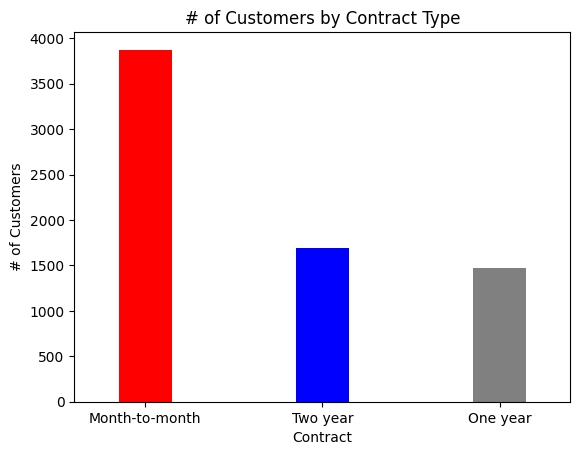

In [10]:
color = ['red', 'blue', 'grey']
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=color)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

## Churn Rate

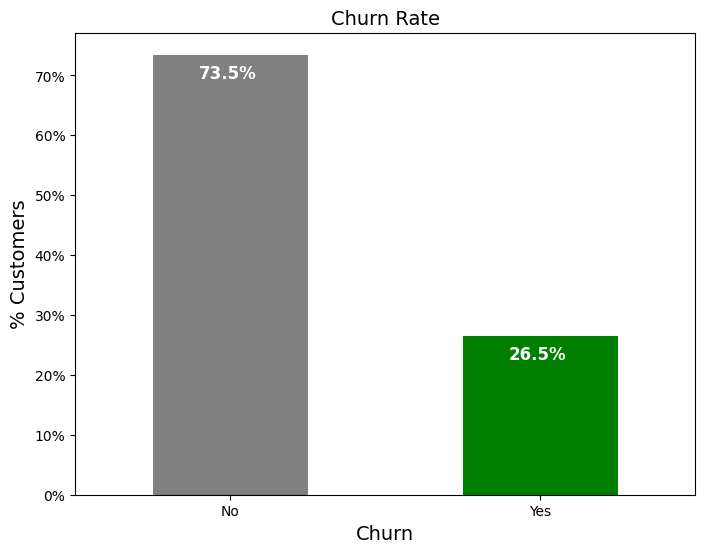

In [11]:
ax = (df['Churn'].value_counts()*100.0 /df.shape[0]).plot(kind='bar',
    stacked = True,rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

total = sum([i.get_width() for i in ax.patches])


for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

# Data transformation and manipulation

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Nhìn qua dữ liệu, ta có thể thấy rằng ngoài cột customer_id, tất cả các cột có datatype là object hoàn toàn là dạng dữ liệu categorical và có thể chuyển về dạng số (float, int). Chúng ta CẦN chuyển chúng về dạng số bất cứ khi nào chúng ta có thể. Ví dụ:

*   Male -> 1, Female -> 0
*   Yes -> 1, No -> 0

[Đọc thêm về các dạng dữ liệu](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)

In [13]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df['gender'].replace({"Yes: 1"}, inplace=True)
df['gender'].replace({"No: 0"}, inplace=True)
df['Partner'].replace({"No: 0", "Yes: 1"}, inplace=True)
df['Dependents'].replace({"No: 0", "Yes: 1"}, inplace=True)
df['PhoneService'].replace({"No: 0", "Yes: 1"}, inplace=True)

df

customerID  gender  SeniorCitizen Partner Dependents  tenure   
0     7590-VHVEG  Female              0     Yes         No       1  \
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...   
0              No  No phone service             DSL             No  ...  \
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0                  No          No          No              No  Month-to-month  \
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges   
0                 Yes           Electronic check          29.85         29.85  \
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 21 columns]

Tuy việc chuyển dữ liệu sang một form numeric nào đó là cần thiết, tuy vậy hardcode, chỉnh sửa bằng tay là điều nên tránh. Mình sẽ demo lại bằng Label Encoder nhé!

In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", engine='c')
customerID = df.customerID
df.drop(["customerID"], axis=1, inplace=True)

In [15]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [16]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
0       0              0        1           0       1             0  \
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup   
0              1                0               0             2  \
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   
0                 0            0            0                0         0  \
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [18]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [19]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
# print(X)
# print(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)
print(X_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
2661       0              0        0           0      66             0  \
4749       1              0        0           0       5             1   
967        1              0        0           1       3             1   
5738       1              0        0           0       1             1   
1807       0              0        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
4010       0              0        0           0       1             1   
1565       0              0        0           0      55             1   
4265       1              1        1           0      66             1   
6511       0              0        1           1      63             1   
6750       1              0        0           0      43             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup   
2661              1                0     

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1552,  561], dtype=int64))

In [22]:
# df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
#                        columns=num_cols)

# Baseline model

In [23]:
cls = SVC(random_state=1)
cls.fit(X_train, y_train)
test_pred = cls.predict(X_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.37      0.42      2113
weighted avg       1.00      0.73      0.85      2113



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [24]:
class SVM_phat:
    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
        self.lambda_param = lambda_param
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_sample, n_feature = X.shape

        y_ = np.where(y <= 0, -1, 1)

        #init weight
        self.w = np.zeros(n_feature)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, X_i in enumerate(X):
                condition = y_[idx] * (np.dot(X_i, self.w) - self.b ) >= 1 
                if condition: 
                    self.w = self.w - self.lr*2*self.lambda_param*self.w
                else:
                    self.w = self.w - self.lr*(2*self.lambda_param- np.dot(X_i,y_[idx]))
                    self.b = self.b - self.lr*y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b 
        return np.sign(approx)

In [25]:
cls = SVM_phat()
# print(X_train)
cls.fit(X_train, y_train)
# test_pred = cls.predict(X_test)
# print(classification_report(test_pred, y_test))

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
2661       0              0        0           0      66             0  \
4749       1              0        0           0       5             1   
967        1              0        0           1       3             1   
5738       1              0        0           0       1             1   
1807       0              0        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
4010       0              0        0           0       1             1   
1565       0              0        0           0      55             1   
4265       1              1        1           0      66             1   
6511       0              0        1           1      63             1   
6750       1              0        0           0      43             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup   
2661              1                0     

# Model Tuning

In [26]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf', 'sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.4s
[CV 2/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.4s
[CV 3/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.4s
[CV 4/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.5s
[CV 5/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.5s
[CV 1/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.1s
[CV 2/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.1s
[CV 3/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.1s
[CV 4/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.1s
[CV 5/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.1s
[CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.5s
[CV 2/5] END ..C=0.0001, gamma=0.01, kerne

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
SVC(C=1000, gamma=1e-05)


In [28]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1552
           1       0.65      0.43      0.52       561

    accuracy                           0.79      2113
   macro avg       0.73      0.67      0.69      2113
weighted avg       0.77      0.79      0.77      2113

